In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from SPHERE.preprocess import *
from SPHERE.SPHERE import *
from SPHERE.utils import *
import numpy as np
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
random_seed = 2022
fix_seed(random_seed)

## Scenario1

In [ ]:
adata = sc.read_h5ad('./scenario1.h5ad')
lsi(adata, use_highly_variable=False, n_components=201)
adata.obsm['feat'] = adata.obsm['X_lsi'].copy()

In [3]:
adata = construct_neighbor_graph(adata, loc_neighbors=10, gene_neighbors=12, com_neighbors=5)

In [4]:
model = SPHERE(adata, device=device, learning_rate=0.0005, dim_output=64, epochs=1000,lambda_fea_recon=0.6,lambda_spa_recon=0.5,
               lambda_recon=1,lambda_con=0.9)

/home/yuzhuohan/workspace/ATAC/our/code_rep/SPHERE/preprocess.py:136: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  return torch.sparse.FloatTensor(indices, values, shape)


In [ ]:
output = model.train()
adata.obsm['latent'] = output['latent']
adata.obsm['latent'] = pca(adata, use_reps='latent', n_comps=20)
sc.pp.neighbors(adata, use_rep='latent', n_neighbors=30)

100%|██████████| 1000/1000 [00:24<00:00, 41.06it/s]


Model training finished!



/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
res = search_res(adata, 5, use_rep='latent', method='leiden', start=0.1, end=1.2, increment=0.01) 
sc.tl.leiden(adata, random_state=0, resolution=res)
label_ref = refine_label(adata, 5, key='leiden')
adata.obs['leiden'] = label_ref 

Searching resolution...
resolution=1.1899999999999995, cluster number=5


In [7]:
from sklearn import metrics
ARI = np.round(metrics.adjusted_rand_score(adata.obs['leiden'], adata.obs['label']), 2)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['leiden'], adata.obs['label']), 2)
HS = np.round(metrics.homogeneity_score(adata.obs['leiden'], adata.obs['label']), 2)
print(NMI)
print(ARI)
print(HS)

0.99
0.99
0.99


/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


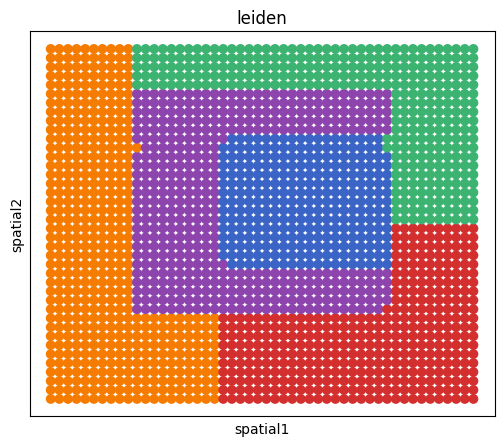

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)
plot_color=["#F57C00","#8E44AD","#D32F2F","#3CB371","#3A64C5"]
sc.pl.embedding(adata, basis="spatial",
                color="leiden",
                s=200,
                show=True,
                palette=plot_color,legend_loc=None)

## Scenario2

In [10]:
adata = sc.read_h5ad('/home/yuzhuohan/workspace/ATAC/our/code_rep/data/Tutorial1:platform-agnostic structural consistency/simu/scenario2.h5ad')
lsi(adata, use_highly_variable=False, n_components=201)
adata.obsm['feat'] = adata.obsm['X_lsi'].copy()

In [11]:
adata = construct_neighbor_graph(adata, loc_neighbors=10, gene_neighbors=12, com_neighbors=5)

In [12]:
model = SPHERE(adata, device=device, learning_rate=0.0005, dim_output=64, epochs=1000,lambda_fea_recon=0.6,lambda_spa_recon=0.5,
               lambda_recon=1,lambda_con=0.9)

In [ ]:
output = model.train()
adata.obsm['latent'] = output['latent']
adata.obsm['latent'] = pca(adata, use_reps='latent', n_comps=20)
sc.pp.neighbors(adata, use_rep='latent', n_neighbors=30)

100%|██████████| 1000/1000 [00:15<00:00, 63.90it/s]


Model training finished!



In [ ]:
res = search_res(adata, 5, use_rep='latent', method='leiden', start=0.1, end=1.2, increment=0.01) 
sc.tl.leiden(adata, random_state=0, resolution=res)
label_ref = refine_label(adata, 5, key='leiden')
adata.obs['leiden'] = label_ref 

Searching resolution...
resolution=1.1899999999999995, cluster number=8
resolution=1.1799999999999995, cluster number=7
resolution=1.1699999999999995, cluster number=7
resolution=1.1599999999999995, cluster number=8
resolution=1.1499999999999995, cluster number=7
resolution=1.1399999999999997, cluster number=7
resolution=1.1299999999999997, cluster number=6
resolution=1.1199999999999997, cluster number=6
resolution=1.1099999999999997, cluster number=6
resolution=1.0999999999999996, cluster number=6
resolution=1.0899999999999996, cluster number=6
resolution=1.0799999999999996, cluster number=6
resolution=1.0699999999999996, cluster number=6
resolution=1.0599999999999996, cluster number=5


In [36]:
from sklearn import metrics
ARI = np.round(metrics.adjusted_rand_score(adata.obs['leiden'], adata.obs['label']), 2)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['leiden'], adata.obs['label']), 2)
HS = np.round(metrics.homogeneity_score(adata.obs['leiden'], adata.obs['label']), 2)
print(NMI)
print(ARI)
print(HS)

0.99
1.0
0.99


/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


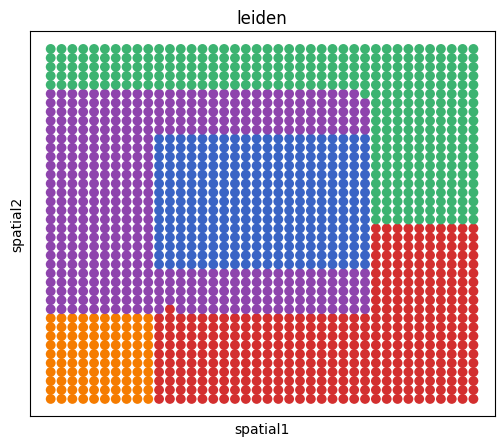

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)
plot_color=["#8E44AD","#D32F2F","#3CB371","#3A64C5","#F57C00"]
sc.pl.embedding(adata, basis="spatial",
                color="leiden",
                s=200,
                show=True,
                palette=plot_color,legend_loc=None)

## Scenario3

In [22]:
adata = sc.read_h5ad('/home/yuzhuohan/workspace/ATAC/our/code_rep/data/Tutorial1:platform-agnostic structural consistency/simu/scenario3.h5ad')
lsi(adata, use_highly_variable=False, n_components=201)
adata.obsm['feat'] = adata.obsm['X_lsi'].copy()

In [23]:
adata = construct_neighbor_graph(adata, loc_neighbors=10, gene_neighbors=12, com_neighbors=5)

In [24]:
model = SPHERE(adata, device=device, learning_rate=0.0005, dim_output=64, epochs=1000,lambda_fea_recon=0.6,lambda_spa_recon=0.5,
               lambda_recon=1,lambda_con=0.9)

In [ ]:
output = model.train()
adata.obsm['latent'] = output['latent']
adata.obsm['latent'] = pca(adata, use_reps='latent', n_comps=20)
sc.pp.neighbors(adata, use_rep='latent', n_neighbors=30)

100%|██████████| 1000/1000 [00:15<00:00, 65.00it/s]


Model training finished!



In [ ]:
res = search_res(adata, 5, use_rep='latent', method='leiden', start=0.1, end=1.2, increment=0.01) 
sc.tl.leiden(adata, random_state=0, resolution=res)
label_ref = refine_label(adata, 5, key='leiden')
adata.obs['leiden'] = label_ref 

Searching resolution...
resolution=1.1899999999999995, cluster number=7
resolution=1.1799999999999995, cluster number=7
resolution=1.1699999999999995, cluster number=8
resolution=1.1599999999999995, cluster number=7
resolution=1.1499999999999995, cluster number=6
resolution=1.1399999999999997, cluster number=6
resolution=1.1299999999999997, cluster number=6
resolution=1.1199999999999997, cluster number=6
resolution=1.1099999999999997, cluster number=6
resolution=1.0999999999999996, cluster number=6
resolution=1.0899999999999996, cluster number=6
resolution=1.0799999999999996, cluster number=6
resolution=1.0699999999999996, cluster number=6
resolution=1.0599999999999996, cluster number=6
resolution=1.0499999999999996, cluster number=6
resolution=1.0399999999999996, cluster number=6
resolution=1.0299999999999996, cluster number=6
resolution=1.0199999999999996, cluster number=6
resolution=1.0099999999999996, cluster number=6
resolution=0.9999999999999996, cluster number=6
resolution=0.989

In [40]:
from sklearn import metrics
ARI = np.round(metrics.adjusted_rand_score(adata.obs['leiden'], adata.obs['label']), 2)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['leiden'], adata.obs['label']), 2)
HS = np.round(metrics.homogeneity_score(adata.obs['leiden'], adata.obs['label']), 2)
print(NMI)
print(ARI)
print(HS)

0.97
0.98
0.96


/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


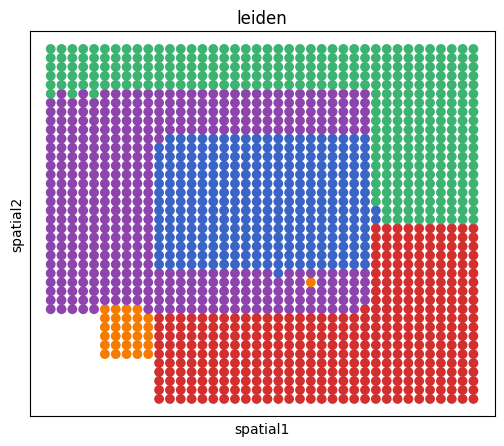

In [41]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)
plot_color=["#8E44AD","#D32F2F","#3CB371","#3A64C5","#F57C00"]
sc.pl.embedding(adata, basis="spatial",
                color="leiden",
                s=200,
                show=True,
                palette=plot_color,legend_loc=None)

## Scenario4

In [42]:
adata = sc.read_h5ad('/home/yuzhuohan/workspace/ATAC/our/code_rep/data/Tutorial1:platform-agnostic structural consistency/simu/scenario4.h5ad')
lsi(adata, use_highly_variable=False, n_components=201)
adata.obsm['feat'] = adata.obsm['X_lsi'].copy()

In [43]:
adata = construct_neighbor_graph(adata, loc_neighbors=10, gene_neighbors=12, com_neighbors=5)

In [44]:
model = SPHERE(adata, device=device, learning_rate=0.0005, dim_output=64, epochs=1000,lambda_fea_recon=0.6,lambda_spa_recon=0.5,
               lambda_recon=1,lambda_con=0.9)

In [ ]:
output = model.train()
adata.obsm['latent'] = output['latent']
adata.obsm['latent'] = pca(adata, use_reps='latent', n_comps=20)
sc.pp.neighbors(adata, use_rep='latent', n_neighbors=30)

100%|██████████| 1000/1000 [00:15<00:00, 65.03it/s]


Model training finished!



In [50]:
res = search_res(adata, 8, use_rep='latent', method='leiden', start=0.1, end=1.2, increment=0.01) 
sc.tl.leiden(adata, random_state=0, resolution=res)
label_ref = refine_label(adata, 5, key='leiden')
adata.obs['leiden'] = label_ref 

Searching resolution...
resolution=1.1899999999999995, cluster number=9
resolution=1.1799999999999995, cluster number=9
resolution=1.1699999999999995, cluster number=9
resolution=1.1599999999999995, cluster number=9
resolution=1.1499999999999995, cluster number=9
resolution=1.1399999999999997, cluster number=9
resolution=1.1299999999999997, cluster number=9
resolution=1.1199999999999997, cluster number=9
resolution=1.1099999999999997, cluster number=9
resolution=1.0999999999999996, cluster number=9
resolution=1.0899999999999996, cluster number=9
resolution=1.0799999999999996, cluster number=9
resolution=1.0699999999999996, cluster number=9
resolution=1.0599999999999996, cluster number=9
resolution=1.0499999999999996, cluster number=9
resolution=1.0399999999999996, cluster number=9
resolution=1.0299999999999996, cluster number=8


In [51]:
from sklearn import metrics
ARI = np.round(metrics.adjusted_rand_score(adata.obs['leiden'], adata.obs['label']), 2)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['leiden'], adata.obs['label']), 2)
HS = np.round(metrics.homogeneity_score(adata.obs['leiden'], adata.obs['label']), 2)
print(NMI)
print(ARI)
print(HS)

0.94
0.96
0.94


/home/yuzhuohan/miniconda3/envs/SPHERE/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


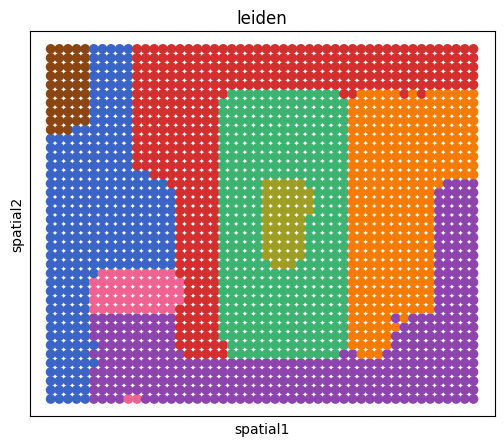

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)
plot_color=["#D32F2F","#8E44AD","#3CB371","#3A64C5","#F57C00","#F06292",
        "#9E9D24","#8B4513"]
sc.pl.embedding(adata, basis="spatial",
                color="leiden",
                s=200,
                show=True,
                palette=plot_color,legend_loc=None)